In [1]:
from tensorflow.keras.models import model_from_json
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

/home/tetsu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tetsu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [17]:
# モデルの読み込み
with open('and.json', 'r') as f:
    json_string = f.read()
model = model_from_json(json_string)

# 重みの読み込み
model.load_weights('and_weight.hdf5')

In [18]:
image_size = 60

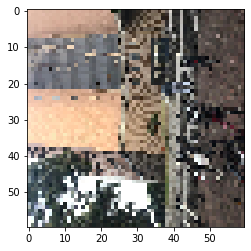

In [19]:
X = []
image = Image.open("./test/1goutou/IMG_4306.JPG")
image = image.convert("RGB")
image = image.resize((image_size, image_size))
data = np.asarray(image)
plt.imshow(data)
X.append(data)

X = np.array(X, dtype=np.uint8)

In [20]:
model.predict(X)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

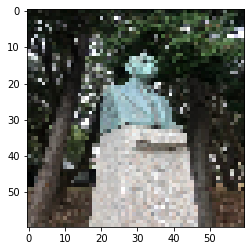

In [21]:
folder = ["4goutou","monotukuri","intarakuthibu", "LL","shokudou","toshokan","1goutou","taiikukan" ,"douzou"]

testX = []
testY = []
for index, name in enumerate(folder):
    dir = "./test/" + name
    files = glob.glob(dir + "/*.JPG")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        plt.imshow(data)
        testX.append(data)
        testY.append(index)

testX = np.array(testX, dtype=np.uint8)
testY = np.array(testY, dtype=int)

In [22]:
for i,j in zip(model.predict(testX).argmax(axis=1), testY):
    if i == j:
        print("true ",folder[i])
    else :
        print("false ", folder[i], folder[j])

true  monotukuri
false  1goutou monotukuri
false  1goutou monotukuri
false  intarakuthibu monotukuri
false  intarakuthibu monotukuri
false  1goutou intarakuthibu
true  intarakuthibu
true  intarakuthibu
true  intarakuthibu
true  intarakuthibu
true  intarakuthibu
false  1goutou intarakuthibu
false  1goutou LL
false  1goutou LL
false  1goutou LL
false  1goutou LL
false  1goutou LL
false  shokudou toshokan
false  1goutou toshokan
false  1goutou toshokan
false  shokudou toshokan
false  shokudou toshokan
false  1goutou toshokan
true  1goutou
true  1goutou
true  1goutou
true  1goutou
true  1goutou
true  1goutou
true  1goutou
false  shokudou taiikukan
false  1goutou taiikukan
false  shokudou taiikukan
false  shokudou taiikukan
false  toshokan taiikukan
false  1goutou douzou
false  1goutou douzou
false  1goutou douzou
false  1goutou douzou
false  1goutou douzou
true  douzou
